In [1]:
import os
from pathlib import Path

import pandas as pd
from spacy.lang.es.stop_words import STOP_WORDS as es_stopwords
from wordcloud import WordCloud

c:\Users\froro\OneDrive\Escritorio\UNAL\RNA\FinancIA\env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Configigurations
path = Path().cwd().parent/"Dataset"

In [3]:
# Functions
def plots_world_cloud(df, title):
    """This function is used to plot the world cloud"""
    text = " ".join(review for review in df)
    wordcloud = WordCloud(background_color="white").generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

In [4]:
df_train = pd.read_csv(path/"train.csv")
df_test = pd.read_csv(path/"test.csv")

df_train["len"] = df_train.text.apply(len)
df_test["len"] = df_test.text.apply(len)

In [5]:
df_train.head()

,id,text,target,target_sentiment,companies_sentiment,consumers_sentiment,len
0,69737,Renfe afronta mañana un nuevo día de paros par...,Renfe,negative,negative,negative,71
1,71795,Presupuesto populista con cimientos frágiles,Presupuesto populista,negative,negative,negative,44
2,77984,Biden no cree que la OPEP+ vaya a ayudar con l...,OPEP+,negative,negative,negative,69
3,82648,La deuda de las familias cae en 25.000 millone...,deuda de las familias,positive,positive,positive,91
4,97337,"Bestinver: no hay ""momento más inoportuno"" par...",Bestinver,negative,negative,negative,57


In [6]:
df_train.target_sentiment = df_train.target_sentiment.str.replace("postive", "positive")
df_train.companies_sentiment = df_train.companies_sentiment.str.replace("postive", "positive")
df_train.consumers_sentiment = df_train.consumers_sentiment.str.replace("positive", "positive")

df_train.consumers_sentiment = df_train.consumers_sentiment.str.replace("neutral?", "neutral")

# Análisis exploratorio para el train


<Axes: xlabel='target_sentiment'>

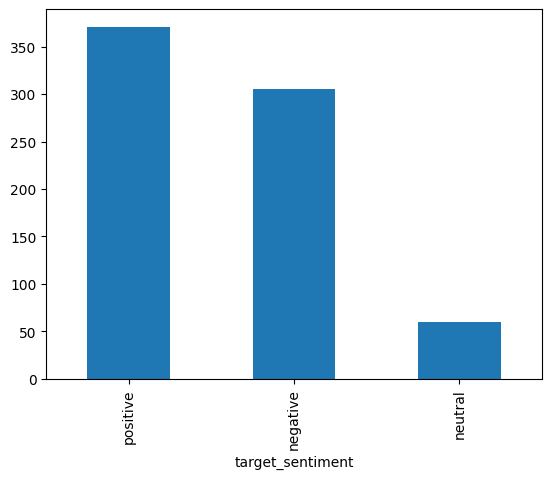

In [7]:
df_train.target_sentiment.value_counts().plot(kind="bar")

<Axes: title={'center': 'len'}, xlabel='target_sentiment'>

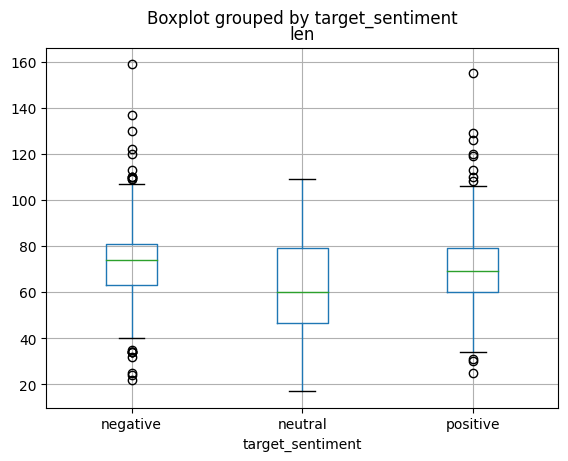

In [8]:
df_train.boxplot(column="len", by="target_sentiment")

In [9]:
df_train.groupby("target_sentiment").len.describe()

,count,mean,std,min,25%,50%,75%,max
target_sentiment,,,,,,,,
negative,305.0,72.757377,18.279091,22.0,63.00,74.0,81.0,159.0
neutral,60.0,62.166667,22.283358,17.0,46.75,60.0,79.0,109.0
positive,371.0,70.536388,17.054781,25.0,60.00,69.0,79.0,155.0


<Axes: xlabel='companies_sentiment'>

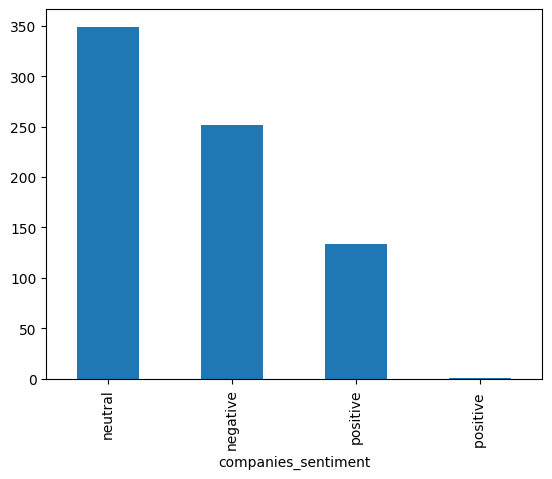

In [10]:
df_train.companies_sentiment.value_counts().plot(kind="bar")

In [11]:
df_train.groupby("companies_sentiment").len.describe()

,count,mean,std,min,25%,50%,75%,max
companies_sentiment,,,,,,,,
negative,252.0,71.376984,18.573552,22.0,59.75,70.0,81.0,159.0
neutral,349.0,70.269341,18.423863,17.0,59.00,72.0,80.0,137.0
positive,134.0,70.925373,17.176933,31.0,60.00,70.0,78.0,120.0
positive,1.0,75.000000,NaN,75.0,75.00,75.0,75.0,75.0


<Axes: title={'center': 'len'}, xlabel='companies_sentiment'>

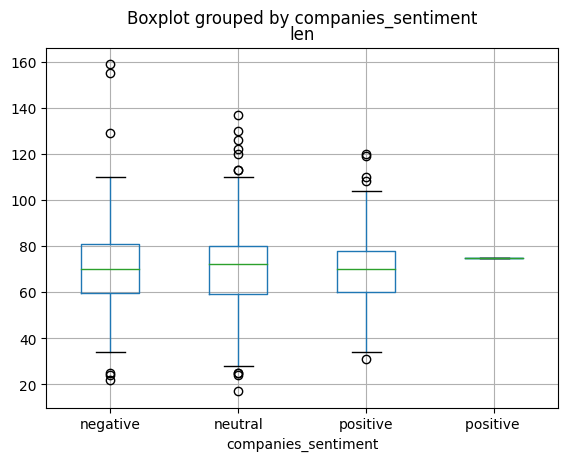

In [12]:
df_train.boxplot(column="len", by="companies_sentiment")

In [13]:
df_train.groupby("companies_sentiment").len.describe()

,count,mean,std,min,25%,50%,75%,max
companies_sentiment,,,,,,,,
negative,252.0,71.376984,18.573552,22.0,59.75,70.0,81.0,159.0
neutral,349.0,70.269341,18.423863,17.0,59.00,72.0,80.0,137.0
positive,134.0,70.925373,17.176933,31.0,60.00,70.0,78.0,120.0
positive,1.0,75.000000,NaN,75.0,75.00,75.0,75.0,75.0


<Axes: xlabel='consumers_sentiment'>

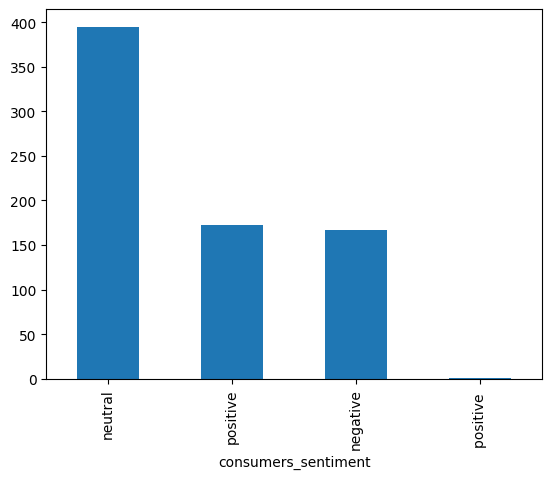

In [14]:
df_train.consumers_sentiment.value_counts().plot(kind="bar")

<Axes: title={'center': 'len'}, xlabel='consumers_sentiment'>

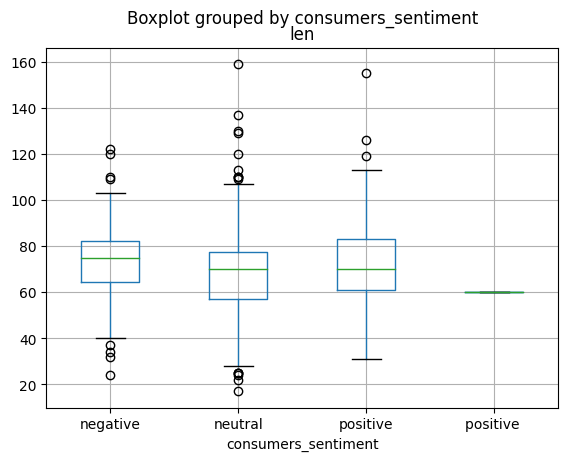

In [15]:
df_train.boxplot(column="len", by="consumers_sentiment")

## Análisis con pysentimiento

In [16]:
from pysentimiento import create_analyzer
analyzer = create_analyzer(task="sentiment", lang="es")
emotion_analyzer = create_analyzer(task="emotion", lang="es")
hate_speech_analyzer = create_analyzer(task="hate_speech", lang="es")

In [24]:
columns =['sentimient', 'sentimient_probas', 'emotion', 'emotion_prob', 'hateful',
       'targeted', 'aggressive']

In [19]:
def get_values(text):
    global analyzer, emotion_analyzer, hate_speech_analyzer
    sentiment = analyzer.predict(text)
    sentiment_tag = sentiment.output
    sentimient_probas = sentiment.probas[sentiment_tag]
    emotion = emotion_analyzer.predict(text)
    emotion_tag = emotion.output
    emotion_prob = emotion.probas[emotion_tag]
    hate_speech = hate_speech_analyzer.predict(text)
    info = {
        "sentimient": sentiment_tag, 
        "sentimient_probas": sentimient_probas,
        "emotion" : emotion_tag,
        "emotion_prob": emotion_prob,
        **hate_speech.probas}

    return info

In [26]:
df_train[columns] = df_train.text.apply(get_values).apply(pd.Series)

In [28]:
df_train.to_csv("train_with_sentiment.csv", index=False)